# Airbnb Price Analysis - Modeling

## Contents

1. Overview
2. Business Understanding
3. The Data
4. [Data Preparation](http://localhost:8888/notebooks/data_preparation.ipynb)
4. Evaluation Metric
5. Modeling
    - Overview of Modeling
        - Group 1: Reviews
            - Logistic Regression (Baseline Model)
            - Random Forest Classifier
            - K-Nearest Neighbors
            - Naive Bayes
            - Neural Network
        - Group 2: Ratings, Reviews & Neighborhoods
            - Logistic Regression
            - Random Forest Classifier
        - Group 3: All Ratings, Reviews, Neighborhoods, Property Type & Bathrooms
            - Logistic Regression
            - Random Forest Classifier
6. Final Models
    - Untuned Logistic Regression
    - Tuned Random Forest
7. Feature Importances
8. Evaluation
9. Recommendations & Next Steps

## Overview

A boutique real estate firm has contracted us out of Manhattan Beach California to help them optimize the Airbnb branch of their business. With hundreds of properties across Los Angeles, this firm wants to ensure that they are maximizing return on each of their properties by setting an optimal per-night price point. With detailed information and numerous written reviews for each of their properties, they wish to uncover whether these written reviews along with other features can be used to set optimal price points.

## Business Understanding

To perform this analysis, we created a classification model to explore whether Airbnb written reviews are reliable predictors for the ‘price per night’ of a given Airbnb listing. Specifically for one-bedroom listings, they occupy most of the Airbnb listings in greater Los Angeles. Based on the results, this analysis will clearly recommend how The Manhattan Beach Group should utilize this model to optimize its price-setting strategy.

## The Data

For this price analysis, we pulled two data sets from [Inside Airbnb](http://insideairbnb.com/get-the-data/). "Inside Airbnb" is a website that sources Airbnb data quarterly for cities worldwide. It includes data on listings, reviews, neighborhoods and calendar information. The first data set includes detailed information such as price, number of bedrooms, neighborhoods, property type, and ratings from over 44,000 Airbnb listings in greater Los Angeles. The second data set includes over 1.5 million written reviews corresponding to the listings in the first data set. In our "Data Preparation" section we merge these two data sets and filter them down to the features of interest.

**How To Get The Data: Apart from the cleaned and processed data (processed_data.csv), the data sets were too large to push to GitHub. Find the relevant download links below:**

[Airbnb Listings & Reviews](http://insideairbnb.com/get-the-data/)



## Evaluation Metric

It’s often the case, in a business problem, that we focus on either minimizing false negatives or false positives. In other words, we focus on precision or recall as our evaluation metric.

In this case, there’s no distinction between the two as both a false positive and a false negative reflect an inaccurate per-night price point prediction. Because of this, we chose accuracy as our evaluation metric. Accuracy in this case is how well our model predicts the actual per-night price point range of one bedroom listing.

## MODELING
### Modeling Map & Overview

We used three different combinations of features for our modeling. Within each combination of features we then ran multiple different types of classfication models. Using GridSearchCV we itterated over each model to get the best possible combination of hyperparamters in order build the most accurate predictive model possible.

**1. Model Features: Reviews**

In this first group of models, the only feature used as a predictor are the tokenized written reviews for each listing.

Models Used:

- Logistic Regression (Baseline Model)
- Random Forest Classifier
- K-Nearest Neighbors
- Naive Bayes
- Neural Network

**2. Model Features: Ratings, Reviews & Neighborhoods**

Models Used:

- Logistic Regression
- Random Forest Classifier

**3. Model Features: All Ratings, Reviews, Neighborhoods, Property Type & Bathrooms**

Models Used:

- Logistic Regression
- Random Forest Classifier

**4. FINAL MODELS**



### Imports and Prepared Data

In [7]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')


from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /Users/jf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# reading in our cleaned and processed data frame
df_processed = pd.read_csv('data/processed_a.csv')
# dropping any nulls that were carried over
df_processed.dropna(inplace=True)

## Dummy Model
Before we dive into modeling let's create a dummy model using out target varibale `price_range`'s distribution. The dummy model will predict the majority class - in this case class 2 of price ranges: 109 - 149. Because we used the interquartile range to define our price ranges, the distribution across classes will be quite even.

In [3]:
# return target class distribution
df_processed['price_range'].value_counts(normalize=True)

2    0.258225
1    0.250000
0    0.248661
3    0.243114
Name: price_range, dtype: float64

### Evaluation
Our dummy model accuracy will be exactly 25.8% as it will alwyas predict second class in this case. **Now let's dig into some modeling...**

## 1. Model Features: `Reviews`

In this first group of models, the only feature used as a predictor are the tokenized written reviews for each listing.

Models Used:
- Linear Regression
- Logistic Regression (Baseline Model)
- Random Forest Classifier
- K-Nearest Neighbors
- Naive Bayes
- Simple Neural Network

### Train Test Split

In [4]:
# train test split 
X = df_processed["processed_reviews"]
y = df_processed["price_range"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

#sanity check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3921,), (1307,), (3921,), (1307,))

### Linear Regression
Let's start off by seeing how a simple Linear Regression performs eventhough this is a classification problem now that we've converted our target variable from continuous to discrete.

In [6]:
# instantiate simple model pipeline with a CountVectorizer
pipe_lr = Pipeline([("vec", CountVectorizer()), ("lreg", LinearRegression())])

# run cross validation on pipeline returning both 'r2' and negative mean squared error scores
scores = cross_validate(pipe_lr, X_train, y_train, cv=3, 
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
scores

In [ ]:
# scores

# {'fit_time': array([878.05117702, 591.76208997, 739.64259696]), '
# score_time': array([2.25494194, 1.80523682, 2.06091213]),
# 'test_r2': array([ -178.56458962, -2651.70339649, -5278.74265526]), 
# 'train_r2': array([0.99903127, 0.99930777, 0.99951327]), 
# 'test_neg_mean_squared_error': array([-7.30324878e+08, -9.05486962e+09,
# -7.63545058e+08]),
#  train_neg_mean_squared_error': array([-1723.67717788, -1457.95388423, -
# 1820.54631292])}

Typically `r^2` scores run from 0 to 1 and the closer to 1 the better the model. The closer to 1, the more variance in the dependant variable is explained by the independant variable. In this case, `price_range` and `reviews` respectively.

Seeing as our `r^2` = -178+, an extremely large negative value, we can say conclusively that a Linear Regression model is not appropriate for this classification problem.

Let's move onto Logistic Regression and Classification Models.

### Logistic Regression - BASELINE MODEL

Our untuned Logistic Regression serves as our baseline model - a simple model to use as a baseline to improve on. Specifically, it uses a basic vectorizer in `CountVectorizer` and an untuned Logistic Regression estimator.

In [49]:
#instantiate pipeline for basic Logistic Regression with CountVectorizer
pipe_logr_base = Pipeline([("vec", CountVectorizer()), ("lreg", LogisticRegression(max_iter=10000))])

# cross-validate & return scores
lr_base_scores = cross_validate(pipe_logr_base, X_train, y_train, 
                                cv=5, return_train_score=True, verbose=3, n_jobs=-3)
                
print(lr_base_scores)
print(lr_base_scores['test_score'].mean())
print(lr_base_scores['train_score'].mean())

# Cross-Validation Test Accuracy Score: 45.98%
# Cross-Validation Train Accuracy Score: 99.21%

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min


{'fit_time': array([102.56653714, 102.21648002, 105.86000609, 105.87197995,
       104.33326411]), 'score_time': array([1.41191792, 1.70204401, 1.63122296, 1.45743322, 1.44440174]), 'test_score': array([0.47073791, 0.44402036, 0.47515924, 0.43949045, 0.47006369]), 'train_score': array([0.99172238, 0.99172238, 0.99267982, 0.99172502, 0.99267982])}
0.4598943291032561
0.9921058844533936


[Parallel(n_jobs=-3)]: Done   5 out of   5 | elapsed:  1.9min finished


### Logistic Regression - Untuned

Let's see how our baseline model improves with a more sophisticated vectorizer in `TfidfVectorizer` but still keeping with the **default parameters** of our estimator (untuned).

TfidfVectorizer vs. Countvectorizer:
- While the basic `CountVectorizer` only focuses on the frequency of tokens, the `TfidfVectorizer` also incorporates the importance of the tokens relative to the corpus, making it more robust and effective when processing text.

In [54]:
# instantiate pipeline for Logistic Regression with TfidfVectorizer
pipe_logr = Pipeline([("vec", TfidfVectorizer()), ("lreg", LogisticRegression(max_iter=10000))])

# cross-validate & return scores
lr_scores = cross_validate(pipe_logr, X_train, y_train, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)
print(lr_scores)
print(lr_scores['test_score'].mean())
print(lr_scores['train_score'].mean())

# Cross-Validation Test Accuracy Score: 51.15%
# Cross-Validation Train Accuracy Score: 84.73%

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   5 | elapsed:   24.4s remaining:   36.6s


{'fit_time': array([14.27813888, 13.752316  , 13.73890376, 14.41407108, 14.07380295]), 'score_time': array([1.60528708, 1.75921679, 1.76015735, 1.68640113, 1.68410993]), 'test_score': array([0.51145038, 0.51653944, 0.51719745, 0.49426752, 0.51847134]), 'train_score': array([0.84909265, 0.85036613, 0.84500318, 0.84022915, 0.85200509])}
0.5115852255230872
0.8473392398963139


[Parallel(n_jobs=-3)]: Done   5 out of   5 | elapsed:   24.9s finished


### Random Forest - Untuned
Simple Random Forest Model without gridsearching hyperparameters.

In [35]:
# instantiate pipeline for RandomForest with TfidfVectorizer
pipe_rf = Pipeline([("vec", TfidfVectorizer()), ("rf", RandomForestClassifier(random_state=42))])

# cross-validate & return scores
rf_scores = cross_validate(pipe_rf, X_train, y_train, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)
print(rf_scores)
print(rf_scores['test_score'].mean())
print(lr_scores['train_score'].mean())

# Cross-Validation Test Accuracy Score: 45.44%
# Cross-Validation Train Accuracy Score: 99%

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   5 | elapsed:   34.0s remaining:   51.0s


{'fit_time': array([23.43206406, 23.97472715, 23.22328997, 23.36877298, 24.07795215]), 'score_time': array([1.67782879, 1.59864712, 1.74338007, 1.64540195, 1.61148214]), 'test_score': array([0.4611465 , 0.47831633, 0.4630102 , 0.4375    , 0.43239796]), 'train_score': array([0.99936224, 0.9987249 , 0.99936245, 0.99936245, 0.9987249 ])}
0.4544741973222409


[Parallel(n_jobs=-3)]: Done   5 out of   5 | elapsed:   34.8s finished


NameError: name 'lr_scores' is not defined

### KNN Model - Untuned
Simple KNN model without GridSearch.

In [138]:
# Construct a pipeline with Tfidf vectorizer and the KNN classifier
pipe_knn = Pipeline([("vec", TfidfVectorizer()), ("knn", KNeighborsClassifier())])

# cross-validate & return scores
knn_scores = cross_validate(pipe_knn, X_train, y_train, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)
print(knn_scores)
print(knn_scores['test_score'].mean())
print(knn_scores['train_score'].mean())

# Cross-Validation Accuracy Score: 38.76%

### Naive Bayes Model - Untuned

The Naive Bayes model and TF-IDF Vectorizer cannot be fitted into the same pipeline in this case.
This requires separate steps for vectorization and model training.

In [136]:
# Initialize the TF-IDF Vectorizer with specified min_df and max_df
tf = TfidfVectorizer()

# Transform the training and test data using the TF-IDF Vectorizer
X_train_tf = tf.fit_transform(X_train.values)
X_train_tf = X_train_tf.toarray()
X_test_tf = tf.transform(X_test.values)
X_test_tf = X_test_tf.toarray()

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# cross-validate & return scores
nb_scores = cross_validate(nb_model, X_train_tf, y_train, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)
print(nb_scores)
print(nb_scores['test_score'].mean())
print(nb_scores['train_score'].mean())

# Cross-Validation Test Accuracy Score: 34.32%
# Cross-Validation Train Accuracy Score: 94.37%

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   5 | elapsed:  3.4min remaining:  5.1min


{'fit_time': array([73.93116689, 76.17754698, 76.17768621, 76.17814803, 73.62222886]), 'score_time': array([ 6.40088511, 10.39545608, 10.39448595, 10.40068984,  5.27453017]), 'test_score': array([0.35286624, 0.35586735, 0.35841837, 0.31760204, 0.33163265]), 'train_score': array([0.94355867, 0.94548932, 0.94389544, 0.94612687, 0.93943258])}
0.34327733004029637
0.9437005775373587


[Parallel(n_jobs=-3)]: Done   5 out of   5 | elapsed:  3.7min finished


### Simple Neural Network

Let's create a simple Neural Network and compare its performance.

In [ ]:
# vectorize text using Tfidf vecotrizer 
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# sparse matrix is converted to a dense matrix to pass through neural network
X_train_vec_dense = X_train_vec.todense()
X_test_vec_dense = X_test_vec.todense()

# OneHot encode y_train to pass through neural network
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# model architecture with dropout rate 0.5
nn = Sequential()
nn.add(Dense(10, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(4, activation='softmax'))

# compilation
nn.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# training
nn.fit(X_train_vec_dense, y_train_encoded, epochs=10, batch_size=1, validation_split=0.2);

# Accuracy Score = 50.57%

### Untuned Models Summary:
- The Logistic Regression and Random Forest models performed best with cross-validation accuracy test scores of 51% and 47% respectively. Next, we'll tune each of these models to maximize their accuracy scores.

### Logistic Regression - GridSearch (18 hour run time)

To tune our model we use GridSearchCV to iterate over the hyperparameters of our model to find the best parameters.

In [ ]:
# instantiate pipeline for Logistic Regression with Tfidf Vectorizer
pipe_logr = Pipeline([("vec", TfidfVectorizer()), ("lreg", LogisticRegression())])

In [ ]:
# grid search for hyperparameter tuning the Logistic Regression

# define parameter grid for the vectorizer and Logistic Regression
log_param_grid = {
    'vec__min_df': [0.01, 0.1, 0.2],
    'vec__max_df': [0.9, 0.95, 1.0],
    'vec__ngram_range': [(1,1), (1,2), (1,3)],
    'lreg__penalty': [None, 'l2', 'l1'],
    'lreg__class_weight': [None, 'balanced'],
    'lreg__solver': ['lbfgs', 'liblinear'],
    'lreg__max_iter': [1000, 10000]
}

# initialize the grid search with relevant parameters
log_grid = GridSearchCV(pipe_logr, log_param_grid, cv=5, n_jobs=-2, verbose=3, 
                        scoring='accuracy', return_train_score=True)

# fit the grid search to the training data
log_grid.fit(X_train, y_train)

# print results
print(log_grid.best_params_)
print(log_grid.best_score_)
print(log_grid.cv_results_)

# Cross-Validation Train Accuracy Score: 50%
# Cross-Validation Train Accuracy Score: 83%

In [ ]:
# tuned logisitic regression best parameters

best_params =
{'log__class_weight': None,
 'log__max_iter': 1000,
 'log__penalty': 'l2',
 'log__solver': 'lbfgs',
 'vec__max_df': 0.9,
 'vec__min_df': 0.05,
 'vec__ngram_range': (1, 2)}

log_tuned_score = 50.12%

**Our tuned Logistic Regression actually performs worse than our default model (default hyperparamters).**
- Default score: 51.15%
- Tuned sore: 50.12%

### Random Forest - GridSearch

To tune our model we use GridSearchCV to iterate over the hyperparameters of our model to find the best parameters.

In [ ]:
# grid search for hyperparameter tuning the Random Forest model

# define parameter grid for the Random Forest model
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__min_samples_split': [2, 3, 4],
    'rf__max_depth': [None, 50, 100],
    'rf__class_weight': [None, 'balanced'],   
    'vec__ngram_range': [(1, 1), (1, 2)],
    'vec__min_df': [0.01, 0.1, 0.2],
    'vec__max_df': [0.9, 0.95, 1.0]
}

# initialize the grid search with relevant parameters
forest_grid = GridSearchCV(pipe_rf, rf_param_grid, cv=5, verbose=3, 
                           scoring='accuracy', n_jobs=-3, return_train_score=True)

# fit the grid search to the training data
forest_grid.fit(X_train2, y_train2)

# print results
print(forest_grid.best_params_)
print(forest_grid.best_score_)
print(forest_grid.cv_results_)

In [3]:
# tuned Random Forest best parameters
best_params = {
    'rf__n_estimators': [50, 100, 200],
    'rf__min_samples_split': [2, 3, 4],
    'rf__max_depth': [None, 50, 100],
    'rf__class_weight': [None, 'balanced'],
    'vec__ngram_range': [(1, 1), (1, 2)],
    'vec__min_df': [0.01, 0.1, 0.2],
    'vec__max_df': [0.9, 0.95, 1.0]
}

# tuned Random Forest best accuracy score
rf_tuned_score = 47.31%

### Group 1 Summary:
**Best Model**: Untuned Logisitc Regression with `TfidfVectorizer`
- CV Test Score: 51%
- CV Train Score: 99%

Based on our high train scores and significantly lower test scores it is fair to say that our best model is currently **overfit** - in other words it is overfitting to our training data and does not generalize well to new data. 

Seeing as **tuned Random Forest** was only 4% less acccurate than our best model it will also move onto the second round of modeling.

**Approach**: One of the primary ways to reduce overfitting is reducing complexity by droppping features. Though, seeing as our model has only interacted with 'text' data from our written reviews we will actually bring in **more features** to see if our test score can improve and shrink the gap between our train and test results.

## 2. Modeling: `Reviews`, `Ratings` & `Neighborhoods`

Models Used:

- Logistic Regression
- Random Forest Classifier

### Train Test Split (New Features)

In [25]:
# train test split 
X = df_processed[["processed_reviews", "review_scores_rating", "neighborhood"]]
y = df_processed["price_range"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# sanity check shape
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((3921, 3), (1307, 3), (3921,), (1307,))

### Using `ColumnTransformer` #1

Now that we are pulling more features into our models - some of which are categorical - our data is **heterogeneous**. We need to make use of a `ColumnTransfomer` as some features require different processing.

In [26]:
# Creating column transformer for text and categorical data
text_pipeline = Pipeline(steps=[('vec', TfidfVectorizer())])

categorical_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

transformer = ColumnTransformer(transformers=[
    ('text', text_pipeline, 'processed_reviews'),
    ('cat', categorical_pipeline, ['neighborhood'])], remainder='passthrough')

### LOGISTIC REGRESSION MODELS

### Logistic Regression - Untuned #2

We'll first run an untuned Logisitc Regression model with the `ColumnTransformer`.

In [2]:
# instantiate pipeline for Logistic Regression with ColumnTransformer
pipe_log2 = Pipeline([("col_tr", transformer), ("log", LogisticRegression(multi_class= 'multinomial', max_iter=10000))])

# cross-validate & return scores
lr_scores2 = cross_validate(pipe_log2, X_train2, y_train2, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)

# print results
print(lr_scores2)
print(lr_scores2['test_score'].mean())
print(lr_scores2['train_score'].mean())

# Cross-Validation Test Accuracy Score: 52.97%
# Cross-Validation Train Accuracy Score: 83.86%

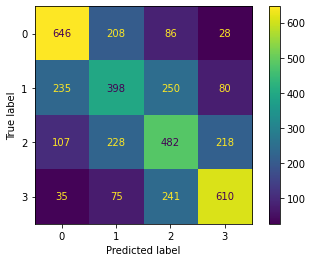

In [18]:
#plot confusion matrix
y_pred_log_cv = cross_val_predict(pipe_log2, X_train2, y_train2, cv=5)

log_matrix = confusion_matrix(y_train2, y_pred_log_cv)
ConfusionMatrixDisplay(log_matrix).plot();

### Logistic Regression - GridSearch #2 (18+ Hours to run)

Seeing as pulling in more features increased our accuracy to 53%, we will now GridSearch our Logisitic Regression hyperparameters using these new features to see if we improve on that score.

In [4]:
#Grid search for hyperparameter tuning the Logistic Regression

#Define parameter grid for the vectorizer and logistic regression
log_param_grid2 = {
    'col_tr__text__vec__min_df': [0.01, 0.1, 0.2],
    'col_tr__text__vec__max_df': [0.9, 0.95, 1.0],
    'col_tr__text__vec__ngram_range': [(1,1), (1,2), (1,3)],
    'log__penalty': [None, 'l2', 'l1'],
    'log__class_weight': [None, 'balanced'],
    'log__solver': ['lbfgs', 'liblinear'],
    'log__max_iter': [1000, 10000]
}


log_grid2 = GridSearchCV(pipe_log2, log_param_grid2, cv=5, n_jobs=-2, verbose=3, 
                        scoring='accuracy', return_train_score=True)
log_grid2.fit(X_train2, y_train2)

print(log_grid2.best_params_)
print(log_grid2.best_score_)
print(log_grid2.cv_results_)

# Cross-Validation Test Accuracy Score: 51%
# Cross-Validation Train Accuracy Score: 84%

**Our tuned Logisitic Regression (51%) is still performing worse than our untuned Logisitc Regression (53%).**

### RANDOM FOREST MODELS

### Random Forest - Untuned #2

In [5]:
# instantiate pipeline for RandomForest Classifier with ColumnTransformer
pipe_rf2 = Pipeline([("col_tr", transformer), ("rf", RandomForestClassifier(random_state=42))])

# cross-validate & return scores
rf_scores2 = cross_validate(pipe_rf2, X_train2, y_train2, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)

#print results
print(rf_scores2)
print(rf_scores2['test_score'].mean())
print(rf_scores2['train_score'].mean())

# Cross-Validation Test Accuracy Score: 46.28%
# Cross-Validation Train Accuracy Score: 100%

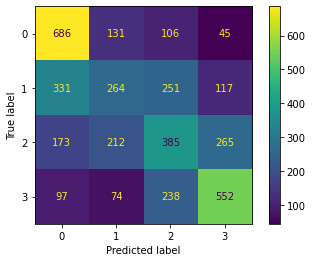

In [21]:
#plot confusion matrix
y_pred_rf_cv2 = cross_val_predict(pipe_rf2, X_train2, y_train2, cv=5)

rf_conf_mat = confusion_matrix(y_train2, y_pred_rf_cv2)
ConfusionMatrixDisplay(rf_conf_mat).plot();

### Random Forest - GridSearch #2

Though our untuned `RandomForestClassifier` (46%) was 7% less accurate than our `LogisticRegression` (53%), we GridSearch the hyperparameters of the `RandomForestClassifier` in case tuning yields a higher accuracy score.

In [ ]:
# Grid search for hyperparameter tuning the Random Forest

# instantiate pipeline for RandomForest Classifier with ColumnTransformer
pipe_rf2 = Pipeline([("col_tr", transformer), ("rf", RandomForestClassifier(random_state=42))])

# Define parameter grid for the Random Forest Model
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__min_samples_split': [2, 3, 4],
    'rf__max_depth': [None, 50, 100],
    'rf__class_weight': [None, 'balanced'],   
    'col_tr__text__vec__ngram_range': [(1, 1), (1, 2)],
    'col_tr__text__vec__min_df': [0.01, 0.1, 0.2],
    'col_tr__text__vec__max_df': [0.9, 0.95, 1.0]
}

forest_grid = GridSearchCV(pipe_rf2, rf_param_grid, cv=5, verbose=3, scoring='accuracy', 
                           n_jobs=-3, return_train_score=True)
forest_grid.fit(X_train2, y_train2)

print(forest_grid.best_params_)
print(forest_grid.best_score_)

# Cross-Validation Test Accuracy Score: 51.36%
# Cross-Validation Train Accuracy Score: 99%

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


In [ ]:
#plot confusion matrix
y_pred_rf_cv = cross_val_predict(rf_best, X_train_m, y_train_m, cv=5)

rf_conf_mat = confusion_matrix(y_train_m, y_pred_rf_cv)
ConfusionMatrixDisplay(rf_conf_mat).plot();

### Group 2 Summary:

**Best Model:** Untuned Logisitc Regression

- CV Test Score: 53%
- CV Train Score: 83%

Our tuned Logisitc Regression, **improved by 2%** after adding additional features. It is still overfit with a training score of 83% but the gap between validation and train score has narrowed by 20%. **This could indicate that adding in more features is helping our model.**

**Approach:** Seeing as adding in more relevant features has increased our accuracy score (even if only slightly), for our next group of models we will pull in even more features to continue improving our models predictive accuracy.

## 3. Modeling: All `Ratings`, `Reviews`, `Neighborhoods`, `Property_Type` & `Bathrooms`

Models Used:

- Logistic Regression
- Random Forest Classifier


### Train Test Split (New Features)


In [9]:
#train test split 
X = df_processed[["processed_reviews", "neighborhood", "bathrooms", "property_type",
                "review_scores_rating","review_scores_accuracy", "review_scores_checkin", 
                "review_scores_communication", "review_scores_value", "review_scores_location",
                "review_scores_cleanliness"]]
y = df_processed["price_range"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.25, random_state=42
)

#sanity check shape
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((3921, 11), (1307, 11), (3921,), (1307,))

### `ColumnTransformer` #2

Let's create a new column transformer for this batch of models.

In [10]:
# Creating column transformer for text and categorical data
text_pipeline = Pipeline(steps=[('vec', TfidfVectorizer())])

categorical_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

transformer2 = ColumnTransformer(transformers=[
    ('text', text_pipeline, 'processed_reviews'),
    ('cat', categorical_pipeline, ['neighborhood', 'property_type'])], remainder='passthrough')

### LOGISTIC REGRESSION MODELS

### Logistic Regression - Untuned #3

In [148]:
# instantiate pipeline for Logistic Regression with ColumnTransformer
pipe_log3 = Pipeline([("col_tr", transformer2), ("log", LogisticRegression(multi_class= 'multinomial', max_iter=10000))])

# cross-validate & return scores
lr_scores3 = cross_validate(pipe_log3, X_train3, y_train3, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)

# print results
print(lr_scores3)
print(lr_scores3['test_score'].mean())
print(lr_scores3['train_score'].mean())

# Cross-Validation Test Accuracy Score: 54.14%
# Cross-Validation Train Accuracy Score: 83.07%

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   5 | elapsed:   51.5s remaining:  1.3min


{'fit_time': array([46.35286093, 45.84984708, 44.37266994, 45.52737927, 47.22150016]), 'score_time': array([1.10013509, 1.09791112, 1.22455788, 1.05668688, 1.070889  ]), 'test_score': array([0.53121019, 0.54336735, 0.53571429, 0.55357143, 0.54336735]), 'train_score': array([0.83418367, 0.83009245, 0.83041122, 0.82371693, 0.83519286])}
0.5414461198492135
0.8307194251624782


[Parallel(n_jobs=-3)]: Done   5 out of   5 | elapsed:   52.6s finished


**- Train Accuracy Score: 83%**
<br>
**- CV Test Accuracy Score: 54%**

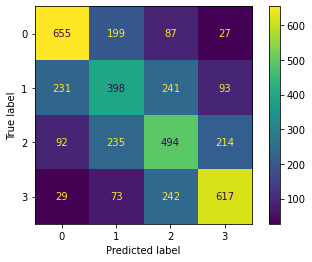

In [35]:
#plot confusion matrix
y_pred_log_cv = cross_val_predict(pipe_log3, X_train3, y_train3, cv=5)

log_matrix = confusion_matrix(y_train3, y_pred_log_cv)
ConfusionMatrixDisplay(log_matrix).plot();

**Though our overall Accuracy score is 54%, if we look deeper, based on the above confusion matrix, our Accuracy for both the first and fourth class of price range is near 70%.**

### Logistic Regression - GridSearch #3

In [1]:
pipe_log3 = Pipeline([("col_tr", transformer2), ("log", LogisticRegression(multi_class= 'multinomial', max_iter=10000))])

log_param_grid3 = {
    'col_tr__text__vec__min_df': [0.01, 0.1, 0.2],
    'col_tr__text__vec__max_df': [0.9, 0.95, 1.0],
    'col_tr__text__vec__ngram_range': [(1,1), (1,2), (1,3)],
    'log__penalty': [None, 'l2', 'l1'],
    'log__class_weight': [None, 'balanced'],
    'log__solver': ['lbfgs', 'liblinear'],
    'log__max_iter': [1000, 10000]}


log_grid3 = GridSearchCV(pipe_log3, log_param_grid3, cv=5, n_jobs=-2, verbose=3, 
                        scoring='accuracy', return_train_score=True)
log_grid3.fit(X_train3, y_train3)

print(log_grid3.best_params_)
print(log_grid3.best_score_)
print(log_grid3.cv_results_)

Let's see how our `RandomForestClassifier` performs with the new features:

### RANDOM FOREST MODELS

### Random Forest - Untuned #3

In [38]:
# instantiate pipeline for RandomForest Classifier with ColumnTransformer
pipe_rf3 = Pipeline([("col_tr", transformer2), ("rf", RandomForestClassifier(random_state=42))])

# cross-validate & return scores
rf_scores3 = cross_validate(pipe_rf3, X_train3, y_train3, 
                        cv=5, return_train_score=True, verbose=3, n_jobs=-3)
print(rf_scores3)
print(rf_scores3['test_score'].mean())
print(rf_scores3['train_score'].mean())

# Cross-Validation Test Accuracy Score: 47.87%
# Cross-Validation Train Accuracy Score: 100%

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   5 | elapsed:   30.6s remaining:   45.9s


{'fit_time': array([21.82319999, 21.96129727, 21.58473516, 21.75527287, 22.150424  ]), 'score_time': array([1.724051  , 1.67461991, 1.8155787 , 1.74916601, 1.69965601]), 'test_score': array([0.46624204, 0.50637755, 0.47066327, 0.49872449, 0.45153061]), 'train_score': array([1., 1., 1., 1., 1.])}
0.4787075913167815
1.0


[Parallel(n_jobs=-3)]: Done   5 out of   5 | elapsed:   31.4s finished


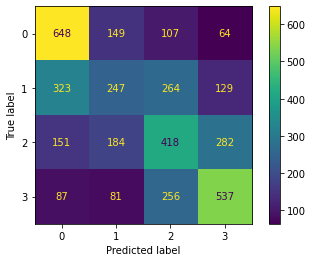

In [38]:
#plot confusion matrix
y_pred_rf_cv3 = cross_val_predict(pipe_rf3, X_train3, y_train3, cv=5)

rf_conf_mat = confusion_matrix(y_train3, y_pred_rf_cv3)
ConfusionMatrixDisplay(rf_conf_mat).plot();

### Random Forest - GridSearch #3

In [6]:
# instantiate pipeline for RandomForest Classifier with ColumnTransformer
pipe_rf3 = Pipeline([("col_tr", transformer2), ("rf", RandomForestClassifier(random_state=42))])

In [ ]:
# Grid search for hyperparameter tuning the Random Forest

# Define parameter grid for the Random Forest Model
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200], 
    'rf__min_samples_split': [2, 3, 4], 
    'rf__max_depth': [None, 50, 100], 
    'rf__class_weight': [None, 'balanced'], 
    'col_tr__text__vec__ngram_range': [(1, 1), (1, 2)], 
    'col_tr__text__vec__min_df': [0.01, 0.1, 0.2], 
    'col_tr__text__vec__max_df': [0.9, 0.95, 1.0]
}

# Instantiate GridSearch and fit it to training data
forest_grid = GridSearchCV(pipe_rf3, rf_param_grid, cv=5, verbose=3, scoring='accuracy')
forest_grid.fit(X_train3, y_train3)

In [ ]:
# tuned Random Forest best parameters #BEFORE CHANGES
rf_best_params = { 
    'col_tr__text__vec__max_df': 0.9, 
    'col_tr__text__vec__min_df': 0.1, 
    'col_tr__text__vec__ngram_range': (1, 1), 
    'rf__class_weight': None, 
    'rf__max_depth': 100, 
    'rf__min_samples_split': 2, 
    'rf__n_estimators': 200
}

# tuned Random Forest best accuracy score
rf_tuned_score = 52.55%

### Random Forest  - GridSearch #3 (2nd round)
We now improve on the GridSearch above by tuning specific paramters based on the above results. For example, we notice that the best 'number of estimators' from the first GridSearch is 200 - which is the maximum value of our range for this parameter. We no set a range of 200 to 300 for that hyperparameter.

In [11]:
# instantiate pipeline for RandomForest Classifier with ColumnTransformer
pipe_rf3 = Pipeline([("col_tr", transformer2), ("rf", RandomForestClassifier(random_state=42))])

In [ ]:
# # Improve on the first GridSearch above. #BEFORE CHANGES
# # Define parameter grid for the Random Forest Model
# rf_param_grid2 = {
#     'rf__n_estimators': [200, 250, 300], 
#     'rf__min_samples_split': [2], 
#     'rf__max_depth': [100, 200, 300], 
#     'rf__class_weight': [None], 
#     'col_tr__text__vec__ngram_range': [(1, 1)], 
#     'col_tr__text__vec__min_df': [0.1], 
#     'col_tr__text__vec__max_df': [.75, .8, 0.9] 
# }

# # Instantiate GridSearch and fit it to training data
# forest_grid2 = GridSearchCV(pipe_rf3, rf_param_grid2, cv=5, verbose=3, scoring='accuracy'
# forest_grid2.fit(X_train3, y_train3)

In [ ]:
# # tuned Random Forest best parameters #BEFORE CHANGES
# rf_best_params = {
# 'col_tr__text__vec__max_df': 0.75,
# 'col_tr__text__vec__min_df': 0.1,
# 'col_tr__text__vec__ngram_range': (1, 1),
# 'rf__class_weight': None, 
# 'rf__max_depth': 100,
# 'rf__min_samples_split': 2,
# 'rf__n_estimators': 300
# }

# # tuned Random Forest best accuracy score
# rf_cv_test_score = 52.79%
# rf_cv_train_score = 100%

### Let's dig into the `max_depth` parameter
By tuning `max_depth` we're hoping to address the overfitting of our RandomForestClassifier. It's training score continues to hover around 100% when it's test score is around 50%. Because we were previously letting the model go so deep with it's splits, it's no surprise that it was so overfit. We imagine that working with smaller `max_depth` values, the model will be significantly less overfit.

In [22]:
# Improve on the first GridSearch above. #BEFORE CHANGES
# Define parameter grid for the Random Forest Model
rf_param_grid3 = {
    'rf__n_estimators': [300], 
    'rf__min_samples_split': [2], 
    'rf__max_depth': [5, 7, 10], 
    'rf__class_weight': [None], 
    'col_tr__text__vec__ngram_range': [(1, 1)], 
    'col_tr__text__vec__min_df': [0.1], 
    'col_tr__text__vec__max_df': [.75] 
}

# Instantiate GridSearch and fit it to training data
forest_grid3 = GridSearchCV(pipe_rf3, rf_param_grid3, cv=5, verbose=3, 
                            return_train_score=True,
                            scoring='accuracy')
forest_grid3.fit(X_train3, y_train3)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=300;, score=(train=0.526, test=0.460) total time=   6.1s
[CV 2/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=300;, score=(train=0.500, test=0.487) total time=   6.0s
[CV 3/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=300;, score=(train=0.517, test=0.444) total time=   6.0s
[CV 4/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=2, rf__min_samples_split=2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tr',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text',
                                                                         Pipeline(steps=[('vec',
                                                                                          TfidfVectorizer())]),
                                                                         'processed_reviews'),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['neighborhood',
                                                                          'property_type'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'col_tr__text__vec__max_df': [0.75],
                         'col_tr__text__vec__min_df': [0.1],
                         'col_tr__text__vec__ngram_range': [(1, 1)],
                         'rf__class_weight': [None],
                         'rf__max_depth': [2, 5, 10],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [300]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [25]:
forest_grid3.best_score_

0.5146672299493045

In [26]:
forest_grid3.best_params_

{'col_tr__text__vec__max_df': 0.75,
 'col_tr__text__vec__min_df': 0.1,
 'col_tr__text__vec__ngram_range': (1, 1),
 'rf__class_weight': None,
 'rf__max_depth': 10,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 300}

In [27]:
# Improve on the first GridSearch above. #BEFORE CHANGES
# Define parameter grid for the Random Forest Model
rf_param_grid3 = {
    'rf__n_estimators': [100, 300], 
    'rf__min_samples_split': [2], 
    'rf__max_depth': [5, 7, 10], 
    'rf__class_weight': [None], 
    'col_tr__text__vec__ngram_range': [(1, 1)], 
    'col_tr__text__vec__min_df': [0.1], 
    'col_tr__text__vec__max_df': [.75] 
}

# Instantiate GridSearch and fit it to training data
forest_grid3 = GridSearchCV(pipe_rf3, rf_param_grid3, cv=5, verbose=3, 
                            return_train_score=True,
                            scoring='accuracy')
forest_grid3.fit(X_train3, y_train3)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=100;, score=(train=0.698, test=0.471) total time=   5.4s
[CV 2/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=100;, score=(train=0.707, test=0.531) total time=   5.3s
[CV 3/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=100;, score=(train=0.692, test=0.480) total time=   5.2s
[CV 4/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=5, rf__min_samples_split=2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tr',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text',
                                                                         Pipeline(steps=[('vec',
                                                                                          TfidfVectorizer())]),
                                                                         'processed_reviews'),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['neighborhood',
                                                                          'property_type'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'col_tr__text__vec__max_df': [0.75],
                         'col_tr__text__vec__min_df': [0.1],
                         'col_tr__text__vec__ngram_range': [(1, 1)],
                         'rf__class_weight': [None],
                         'rf__max_depth': [5, 7, 10],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [100, 300]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [28]:
forest_grid3.best_score_

0.5220655141037306

In [29]:
forest_grid3.best_params_

{'col_tr__text__vec__max_df': 0.75,
 'col_tr__text__vec__min_df': 0.1,
 'col_tr__text__vec__ngram_range': (1, 1),
 'rf__class_weight': None,
 'rf__max_depth': 7,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 300}

In [12]:
# Improve on the first GridSearch above. #BEFORE CHANGES
# Define parameter grid for the Random Forest Model
rf_param_grid3 = {
    'rf__n_estimators': [300], 
    'rf__min_samples_split': [2], 
    'rf__max_depth': [7], 
    'rf__class_weight': [None], 
    'col_tr__text__vec__ngram_range': [(1, 1), (1,2)], 
    'col_tr__text__vec__min_df': [0.1], 
    'col_tr__text__vec__max_df': [.75] 
}

# Instantiate GridSearch and fit it to training data
forest_grid3 = GridSearchCV(pipe_rf3, rf_param_grid3, cv=5, verbose=3, 
                            return_train_score=True,
                            scoring='accuracy')
forest_grid3.fit(X_train3, y_train3)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=7, rf__min_samples_split=2, rf__n_estimators=300;, score=(train=0.854, test=0.503) total time=   9.6s
[CV 2/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=7, rf__min_samples_split=2, rf__n_estimators=300;, score=(train=0.850, test=0.577) total time=  10.1s
[CV 3/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=7, rf__min_samples_split=2, rf__n_estimators=300;, score=(train=0.845, test=0.526) total time=   9.6s
[CV 4/5] END col_tr__text__vec__max_df=0.75, col_tr__text__vec__min_df=0.1, col_tr__text__vec__ngram_range=(1, 1), rf__class_weight=None, rf__max_depth=7, rf__min_samples_split=2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tr',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text',
                                                                         Pipeline(steps=[('vec',
                                                                                          TfidfVectorizer())]),
                                                                         'processed_reviews'),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['neighborhood',
                                                                          'property_type'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'col_tr__text__vec__max_df': [0.75],
                         'col_tr__text__vec__min_df': [0.1],
                         'col_tr__text__vec__ngram_range': [(1, 1), (1, 2)],
                         'rf__class_weight': [None], 'rf__max_depth': [7],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [300]},
             return_train_score=True, scoring='accuracy', verbose=3)

**Only a .2% increase in validation test score from the first GridSearch.**

In [ ]:
#plot confusion matrix
y_pred_rf_cv3 = cross_val_predict(pipe_rf3, X_train3, y_train3, cv=5)
rf_conf_mat = confusion_matrix(y_train3, y_pred_rf_cv3)
ConfusionMatrixDisplay(rf_conf_mat).plot();

**Though our overall Accuracy score is 53%, if we look deeper, based on the above confusion matrix, our Accuracy for both the first and fourth class of price range is also near 70%.**

### Group 3 Summary:
**Best Models:**
1. Untuned Logisitc Regression

- CV Test Score: 54%
- CV Train Score: 83%

2. Tuned Random Forest

- CV Test Score: 53%
- CV Train Score: 100%


Our tuned Logisitc Regression, improved by 1% to 54% after adding additional features. Our second best model, our Tuned Random Forest, was not far behind with 53%. Though our Logistic Regression had the highest validation score though its training score actually dropped from 99% down to 83% whereas our second-best model, Random Forest's, training score remained at 100%. **This suggests that our Random Forest Classifier may outperform the Logistic Regression as we pull in more features and data.**

### FINAL MODELS:
### Logisitc Regression #3 - Untuned

In [7]:
# Best Logisitic Regression Model & Hyperparamters

# column transformer for text and categorical data
text_pipeline = Pipeline(steps=[('vec', TfidfVectorizer())])

categorical_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

transformer2 = ColumnTransformer(transformers=[
    ('text', text_pipeline, 'processed_reviews'),
    ('cat', categorical_pipeline, ['neighborhood', 'property_type'])], remainder='passthrough')

# instantiate pipeline for Logistic Regression with ColumnTransformer
pipe_log3 = Pipeline([("col_tr", transformer2), ("log", LogisticRegression(multi_class= 'multinomial', max_iter=10000))])
 
log_best_score = 0.5414

print(f"Untuned Logisitc Regression Cross Validation Accuracy: {log_best_score*100:,.2f}%")


### Best Logistic Regression on Test Data

In [151]:
pipe_log3.fit(X_train3, y_train3)
y_pred_log_best = pipe_log3.predict(X_test3)
log_best_test_acc = accuracy_score(y_test3, y_pred_log_best)
log_best_test_acc
# Logistic Regression TEST score = 55%

### Random Forest #3 - Tuned

In [ ]:
# Best Model & Hyperparamters

rf_vectorizer_best_params = {
    'col_tr__text__vec__max_df': 0.75,
    'col_tr__text__vec__min_df': 0.1,
    'col_tr__text__vec__ngram_range': (1, 1)
}

rf_best_params = {

    'rf__class_weight': None,
    'rf__max_depth': 100,
    'rf__min_samples_split': 2,
    'rf__n_estimators': 300
}

forest_best_score = 0.5279

print(f"Tuned Random Forest Cross Validation Accuracy: {forest_best_score*100:,.2f}%")

### Best Random Forest on Test Data

In [4]:
pipe_rf3.fit(X_train3, y_train3)
y_pred_rf_best = pipe_rf3.predict(X_test3)
rf_best_test_acc = accuracy_score(y_test3, y_pred_rf_best)
rf_best_test_acc
# Random Forest TEST score = 53%

### Feature Importances

Let's extract the top 10 feature importances from our best performing Random Forest Classifier. Specifically we are looking at the feature importances of out `reviews`, text data, therefore our features will be specific words. In our top 10 we find words like 'nice', 'beautiful', 'great' and 'clean' which all have positive conotations. This indicates that our model relies more heavily on these positive words when making predictions about price.

In [39]:
# Extract the TfidfVectorizer from the pipeline
tf_vec = pipe_rf3.named_steps['col_tr'].transformers[0][1]['vec']

X_train_tf = tf_vec.fit_transform(X_train)

#Get the feature names from the TfidfVectorizer
feature_names = tf_vec.get_feature_names_out()

# Extract the RandomForestClassifier from the pipeline
rf = pipe_rf.named_steps['rf']

rf.fit(X_train_tf, y_train)

# Get the feature importances from the fitted RandomForestClassifier
feature_importances = rf.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
importances_df = pd.DataFrame({"feature_names": feature_names, "importances": feature_importances})

df_imp = importances_df.sort_values(by=['importances'], ascending=False)[0:10]
df_imp

,feature_names,importances
34861,place,0.005467
43726,stay,0.004200
31294,nice,0.004065
20159,great,0.004056
4721,beautiful,0.004030
8721,clean,0.004004
27222,location,0.003584
39665,room,0.003552
22048,host,0.003400
10736,cozy,0.003253


In [41]:
df_imp.to_csv('data/feature_imp.csv')

/Users/jf/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


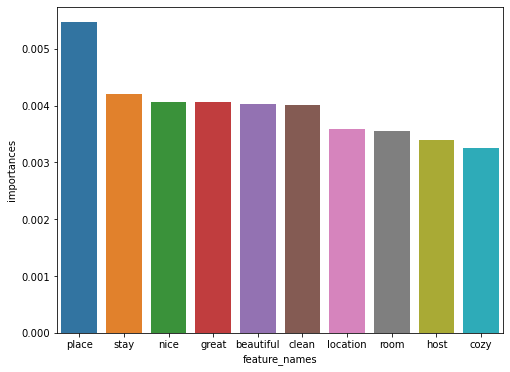

In [129]:
# plot bar of feature importances
# size the plot
plt.figure(figsize=(8,6))

# plot using seaborn
sns.barplot(df_imp.feature_names, df_imp.importances);

## Evaluation

- Typically, in a classficiation problem, a regression estimator such as Logistic Regression is less suited for the task as it assumes a linear relationship. Where as, its classifier counter parts such as Decision Trees and Random Forests are well suited for classification as they focus on feature selection - weighing important features more heavily. **It is interesting then that our Logisitc Regression had the highest accuracy score.** 


- That said, as we increased the number of features in our model to improve on our cross-validation test scores, our Logisitic Regression training scores actually dropped from 99% down to 83% where as our Random Forest model's (second best) training score remained at 100%. This suggests that as we pull in more features and more data our Random Forest Classifier may end up outperforming the Logistic Regression.


- Our best model has a low accuracy score of 55%. This means that our model accurately predicts the actual price of a listing 55% of the time based on the chosen features.


- Though our test scores were low, an important thing to note is that our training scores were as high as 100%. This means we could potentially get to a decent predictor by continuing to tune our model to increase our accruacy score.

## Conclusion
### Recommendations

1. **Unreliable Model** - At this point in time, this predictive model is not reliable enough to solve The Manhattan Beach Group's business problem of optimizing per night price point setting. Implementing a price prediction model with an accuracy score just over 50% is not a feasible business strategy.


2. **Use Model For Specific Classes** - Though our overall Accuracy score for our best model is 55%, as mentioned above, if we look deeper, our Accuracy for both the first and fourth class of price ranges is near 70%. We recommend price setting based on our models' predictions only if it predicts the first or fourth class of price ranges - and even then, take the predictions with a grain of salt as again, the model is only 70% accurate in those cases.


### Next Steps
1. **Potential for a good predictor** - Though our current model falls short, as noted in our evaluation, there is potential for a good model to be developed. The biggest barrier that we faced was extremely long model tuning times. Given more time we are confident we can improve our model enough to make it a good price predictor. Specifically, we believe that working with a much larger data set could help our model generalize better. This could be easily achieved as Airbnb data is widely accessible.

2. **Parallel Analysis** - Seeing that there are over 70 distinct features in Airbnb Listings data, we recommend funding a parallel analysis that focuses on these features rather than the written reviews for each listing.

3. **Advanced Data Processing** - Given more time we would implement more advanced data processing techniques. Specifically, we would utilize pre-trained text processing models such BERT, a deep learning model developed specifically for text classification.